<a href="https://colab.research.google.com/github/coder-rakeshpaul/EmotionAnalysis/blob/main/Emotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import seaborn as sns
import nltk
import string
import re
import inflect

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mayur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Reading the data amd converting it into a dataframe

In [70]:
df1 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv')
df2 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv')
df3 = pd.read_csv('https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv')
frames = [df1, df2, df3]
data = pd.concat(frames)

Droping unnecessary columns

In [71]:
data=data.drop(['id','author','subreddit','link_id','parent_id','created_utc','rater_id','example_very_unclear'], axis=1)
data.shape

(211225, 29)

Droping the duplicates

In [72]:
data.drop_duplicates(subset='text', inplace=True)
data.reset_index(drop=True, inplace=True)
data.shape

(57732, 29)

Droping data with mixed emotions

In [73]:
sum = np.array(data.sum(axis=1))
ind = np.where(np.logical_or(sum>1, sum==0))[0].tolist()
data.drop(ind, inplace = True)
data.reset_index(drop=True, inplace=True)
data.shape

C:\Users\mayur\AppData\Local\Temp\ipykernel_22424\1218242578.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum = np.array(data.sum(axis=1))


(46741, 29)

Creating a list of emotions

In [74]:
emotions = list(data.columns)[1:]

In [75]:
emo = []
for text in range(0, data.shape[0]):
  for emotion in emotions:
    if data.loc[text][emotion] == 1:
      emo.append(emotion)


In [76]:
data.drop(data.iloc[:, 1:29], inplace=True, axis=1)

In [77]:
data

,text
0,That game hurt.
1,"You do right, if you don't care then fuck 'em!"
2,Man I love reddit.
3,"[NAME] was nowhere near them, he was by the Fa..."
4,Right? Considering it’s such an important docu...
...,...
46736,Oh [NAME] i forgot about those. I used to love...
46737,I didn’t even notice that one. I noticed the b...
46738,"Thanks, [NAME]"
46739,Everyone likes [NAME].


In [78]:
data['Emotions']= emo

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Emotion_id'] = le.fit_transform(data['Emotions'])

data

,text,Emotions,Emotion_id
0,That game hurt.,sadness,26
1,"You do right, if you don't care then fuck 'em!",neutral,20
2,Man I love reddit.,love,18
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20
4,Right? Considering it’s such an important docu...,gratitude,15
...,...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love,18
46737,I didn’t even notice that one. I noticed the b...,neutral,20
46738,"Thanks, [NAME]",gratitude,15
46739,Everyone likes [NAME].,love,18


c:\Users\mayur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Emotion_id'>

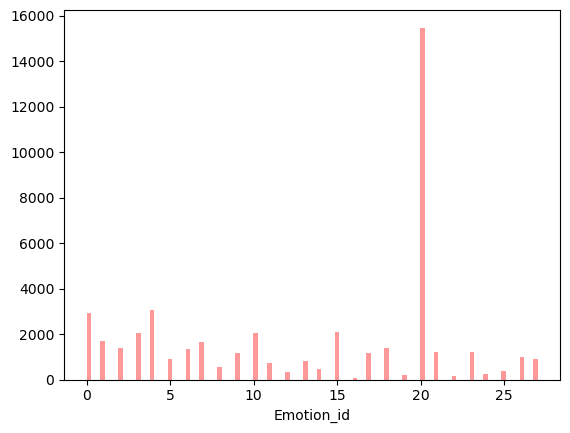

In [79]:
from seaborn import distplot

distplot(data['Emotion_id'], kde=False, color='red', bins=100)

Preprocessing the data

In [80]:
def text_lowercase(text):
	return text.lower()
 
import string
# remove punctuation
def remove_punctuation(text):
	return text.translate(str.maketrans('', '', string.punctuation))

Removing stop words

In [81]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
# remove stopwords function
def remove_stopwords_tokenize_and_stem(text):
	stop_words = set(stopwords.words("english"))
	word_tokens = word_tokenize(text)
	filtered_text = [word for word in word_tokens if word not in stop_words]
	stems = [stemmer.stem(word) for word in filtered_text]
	return stems

Stemming the data

In [82]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()

# stem words in the list of tokenized words
def stem_words(text):
	word_tokens = word_tokenize(text)
	stems = [stemmer.stem(word) for word in word_tokens]
	return stems

In [83]:
def text_preprocess(text):
  t = remove_punctuation(text)
  t = text_lowercase(t)
  t = remove_stopwords_tokenize_and_stem(t)
  return t

In [84]:
data

,text,Emotions,Emotion_id
0,That game hurt.,sadness,26
1,"You do right, if you don't care then fuck 'em!",neutral,20
2,Man I love reddit.,love,18
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20
4,Right? Considering it’s such an important docu...,gratitude,15
...,...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love,18
46737,I didn’t even notice that one. I noticed the b...,neutral,20
46738,"Thanks, [NAME]",gratitude,15
46739,Everyone likes [NAME].,love,18


In [85]:
data['tokenized'] = data.apply(lambda x: text_preprocess(x['text']), axis=1)

In [86]:
data

,text,Emotions,Emotion_id,tokenized
0,That game hurt.,sadness,26,"[game, hurt]"
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]"
2,Man I love reddit.,love,18,"[man, love, reddit]"
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]"
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam..."
...,...,...,...,...
46736,Oh [NAME] i forgot about those. I used to love...,love,18,"[oh, name, forgot, use, love]"
46737,I didn’t even notice that one. I noticed the b...,neutral,20,"[’, even, notic, one, notic, bottom, right, one]"
46738,"Thanks, [NAME]",gratitude,15,"[thank, name]"
46739,Everyone likes [NAME].,love,18,"[everyon, like, name]"


**Removing rows in which the token list is empty (this occurs due to stemming)**

In [87]:
emp_token_ind = []

tokens = data['tokenized'].to_numpy()
for i in range(0, tokens.size):
    if len(tokens[i]) == 0:
        emp_token_ind.append(i)

data.drop(emp_token_ind ,axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [88]:
data

,text,Emotions,Emotion_id,tokenized
0,That game hurt.,sadness,26,"[game, hurt]"
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]"
2,Man I love reddit.,love,18,"[man, love, reddit]"
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]"
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam..."
...,...,...,...,...
46637,Oh [NAME] i forgot about those. I used to love...,love,18,"[oh, name, forgot, use, love]"
46638,I didn’t even notice that one. I noticed the b...,neutral,20,"[’, even, notic, one, notic, bottom, right, one]"
46639,"Thanks, [NAME]",gratitude,15,"[thank, name]"
46640,Everyone likes [NAME].,love,18,"[everyon, like, name]"


In [89]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

model = Word2Vec(window=5, min_count=1, workers=4, sg=0)

model.build_vocab(data['tokenized'], progress_per=1000)
model.train(data['tokenized'], total_examples=model.corpus_count, epochs=model.epochs)

model.save("main/saved models/word2vec.model")

In [90]:
model.wv.most_similar('best')
(model.wv['game'] + model.wv['hurt'])/2

array([-0.30261147,  0.26176733,  0.1866504 ,  0.25571012,  0.24776149,
       -0.95814013,  0.32849348,  1.1878123 , -0.78501815, -0.38097623,
       -0.45976058, -0.69068325, -0.20034996,  0.25893027,  0.13567428,
       -0.30115867, -0.18865202, -0.42014045, -0.04275019, -1.1013728 ,
        0.34176898,  0.15480022,  0.39784724, -0.6065619 , -0.10443486,
       -0.03162997, -0.06404519, -0.5308155 , -0.63378537, -0.03699438,
        0.6107504 ,  0.1457814 ,  0.35861638, -0.40513313,  0.0196539 ,
        1.1608706 , -0.17513372, -0.5440571 , -0.4265335 , -1.0347345 ,
        0.19026089, -0.51676285, -0.4938383 ,  0.03504951,  0.4776766 ,
       -0.45484382, -0.2810979 , -0.05856519,  0.45563117,  0.4641859 ,
        0.39389154, -0.2720823 , -0.2729907 , -0.0079833 , -0.36532187,
        0.42244607,  0.37231117, -0.0543617 , -0.4906149 ,  0.19640894,
        0.00546399,  0.3237471 , -0.0927534 , -0.11725763, -0.53164876,
        0.59930044,  0.26625717,  0.45939773, -1.000041  ,  0.81

Vectorize the tokenized lists

In [91]:
inputs = []

for token in data['tokenized']:
    inputs.append(model.wv[token])

data['Inputs'] = inputs


In [92]:
print(data['Inputs'][0])

[[-4.74988461e-01  9.29299220e-02  3.06610942e-01  3.38018417e-01
   4.20355767e-01 -1.16017056e+00  5.27506649e-01  1.21456981e+00
  -1.05778849e+00 -3.33108187e-01 -6.20506287e-01 -6.54106617e-01
  -2.28818744e-01  2.72215068e-01  7.59876594e-02 -3.71189117e-01
  -3.48889887e-01 -5.18441081e-01 -2.30895415e-01 -1.24454010e+00
   4.15214121e-01  1.03632830e-01  4.16955203e-01 -8.08706939e-01
  -1.55432239e-01 -1.14694424e-01 -3.68382260e-02 -6.43112421e-01
  -8.03711772e-01 -9.96097103e-02  6.89423978e-01  3.11697066e-01
   4.79926884e-01 -3.05700898e-01  2.96911709e-02  1.61580789e+00
  -3.51437062e-01 -6.29315555e-01 -4.81152773e-01 -1.26470196e+00
   2.08524793e-01 -5.90791404e-01 -5.95241249e-01  6.38035610e-02
   5.32642484e-01 -5.19159913e-01 -2.28586495e-01 -1.43717095e-01
   6.23739839e-01  5.95582843e-01  6.01371348e-01 -1.64545730e-01
  -3.20434034e-01  1.23332597e-01 -4.69849706e-01  5.15085161e-01
   4.67009634e-01 -5.66342995e-02 -5.26452124e-01  7.13161528e-02
  -6.22816

Perform **Average Word2Vec** on the input column

In [93]:
inputs = []
for input in data['Inputs']:
    sum = 0
    for i in input:
        sum = sum + i
    avg = sum/len(input)
    inputs.append(avg)

data['Inputs'] = inputs


In [94]:
data

,text,Emotions,Emotion_id,tokenized,Inputs
0,That game hurt.,sadness,26,"[game, hurt]","[-0.30261147, 0.26176733, 0.1866504, 0.2557101..."
1,"You do right, if you don't care then fuck 'em!",neutral,20,"[right, dont, care, fuck, em]","[-0.004342124, 0.6495292, 0.10369728, 0.225765..."
2,Man I love reddit.,love,18,"[man, love, reddit]","[-0.22838438, 0.37147006, 0.15810378, 0.262436..."
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,20,"[name, nowher, near, falcon]","[-0.122107826, 0.10563669, 0.19321139, 0.15848..."
4,Right? Considering it’s such an important docu...,gratitude,15,"[right, consid, ’, import, document, know, dam...","[-0.07131839, 0.5125465, 0.015754245, 0.179584..."
...,...,...,...,...,...
46637,Oh [NAME] i forgot about those. I used to love...,love,18,"[oh, name, forgot, use, love]","[-0.20389645, 0.35728028, 0.2398278, 0.2687414..."
46638,I didn’t even notice that one. I noticed the b...,neutral,20,"[’, even, notic, one, notic, bottom, right, one]","[-0.10808791, 0.5555765, 0.09670617, 0.2207206..."
46639,"Thanks, [NAME]",gratitude,15,"[thank, name]","[-0.25972205, 0.2130062, 0.23486057, 0.3517770..."
46640,Everyone likes [NAME].,love,18,"[everyon, like, name]","[-0.096411705, 0.4445345, 0.25959486, 0.462432..."


In [95]:
data.to_csv('main/saved data/tokenized_inputs.csv')

Since the emotions classes are imbalanced we apply **SMOTE algorithm** to generate synthetic data

In [96]:
X = [input for input in data['Inputs']]
y = np.array(data['Emotion_id'])

In [97]:
smt = SMOTE(random_state=42)
X, y = smt.fit_resample(X, y)

c:\Users\mayur\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

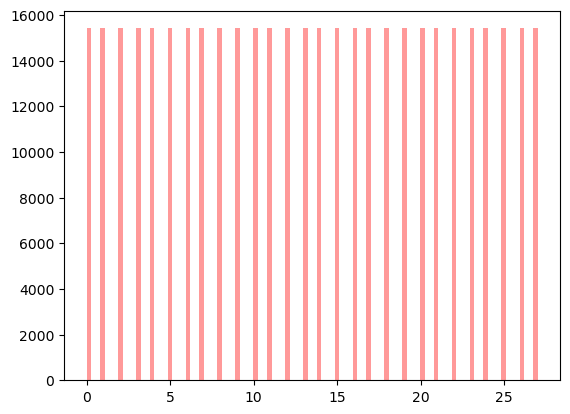

In [98]:
distplot(y, kde=False, color='red', bins=100)

In [99]:
df = {'Input':X, 'Output':y, 'Emotions':le.inverse_transform(y)}
df_io = pd.DataFrame(df)
df_io.to_csv('main/saved data/balanced_io.csv')
df_io

,Input,Output,Emotions
0,"[-0.30261147022247314, 0.26176732778549194, 0....",26,sadness
1,"[-0.004342123866081238, 0.649529218673706, 0.1...",20,neutral
2,"[-0.2283843755722046, 0.37147006392478943, 0.1...",18,love
3,"[-0.12210782617330551, 0.10563669353723526, 0....",20,neutral
4,"[-0.07131838798522949, 0.5125464797019958, 0.0...",15,gratitude
...,...,...,...
431559,"[-0.07701147347688675, 0.19827160239219666, 0....",27,surprise
431560,"[-0.13109228014945984, 0.2900468707084656, 0.0...",27,surprise
431561,"[-0.1740868240594864, 0.31000813841819763, 0.1...",27,surprise
431562,"[-0.20114217698574066, 0.5391176342964172, 0.0...",27,surprise
